# Module 2: EDA Understanding the problem space

First we load the datasets, previously downloaded with the script download_datasets.py.
For each of them we do an initial exploration of the information stored and perform sanity checks.

In [1]:
import pandas as pd
from pathlib import Path

def load_parquet_files(folder: str) -> dict[str, pd.DataFrame]:
    path = Path(folder)
    dfs = {}
    for file in path.glob("*.parquet"):
        name = file.stem
        dfs[name] = pd.read_parquet(file)
        print(f"Loaded {name}: {dfs[name].shape}")
    return dfs

dfs = load_parquet_files("groceries_datasets/raw/")

orders = dfs["orders"]
regulars = dfs["regulars"]
abandoned = dfs["abandoned_carts"]
inventory = dfs["inventory"]
users = dfs["users"]

Loaded users: (4983, 10)
Loaded orders: (8773, 6)
Loaded abandoned_carts: (5457, 4)
Loaded inventory: (1733, 6)
Loaded regulars: (18105, 3)


## Initial exploration and quick checks

In [2]:
from IPython.display import display

def check_mixed_data_types(df: pd.DataFrame, verbose: bool = True) -> dict:
    """
    Checks for columns with mixed data types in a DataFrame.
    """
    mixed_columns = {}

    for col in df.columns:
        type_counts = df[col].apply(lambda x: type(x).__name__).value_counts()
        if len(type_counts) > 1:
            mixed_columns[col] = type_counts.to_dict()
            if verbose:
                print(f"\nColumn '{col}' has mixed types:")
                print(type_counts)
    if verbose and not mixed_columns:
            print("No columns with mixed data types found.")
    return mixed_columns



def dataset_initial_exploration(df: pd.DataFrame, name: str = "Dataset"):
    """
    Performs a basic exploratory analysis of the DataFrame.
    """
    print(f"\n--- {name} Initial check ---")
    print(f"Shape: {df.shape}")
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nSample Rows:\n")
    display(df.sample(min(5, len(df))))
    print("\nChecking for mixed data types...")
    check_mixed_data_types(df)


### Check orders dataframe

In [3]:
dataset_initial_exploration(orders, 'Orders')


--- Orders Initial check ---
Shape: (8773, 6)

Data Types:
 id                         int64
user_id                   object
created_at        datetime64[us]
order_date        datetime64[us]
user_order_seq             int64
ordered_items             object
dtype: object

Missing Values:
 id                0
user_id           0
created_at        0
order_date        0
user_order_seq    0
ordered_items     0
dtype: int64

Sample Rows:



,id,user_id,created_at,order_date,user_order_seq,ordered_items
37642,3873455046788,976329131971b0e205c3c3394409c7d4ff8a0acbdc13a7...,2021-11-08 11:59:40,2021-11-08,2,"[33826431729796, 34086451642500, 3411360609088..."
6251,2893243777156,f458007fb54eb38cac35d8d511fd06083ddf015da78fca...,2021-01-09 15:34:54,2021-01-09,1,"[33667265855620, 33826414231684, 3382643100890..."
35464,3865667731588,f713fbdb3756858c500a6eb0bf4831c5213a4d142511cd...,2021-10-30 18:54:43,2021-10-30,1,"[33667185279108, 33667265855620, 3366728951411..."
32254,3848790900868,ecfc53ac84d9db2930d47ba66a842202ea6eae8c71beba...,2021-10-13 11:47:12,2021-10-13,3,"[34519123886212, 34519123886212, 3451912388621..."
62879,4015349366916,b2c4377d356912299a56b62a5f14935806a45b22bd09d8...,2022-03-03 07:11:52,2022-03-03,4,"[33826420850820, 33826420850820, 3382642822362..."



Checking for mixed data types...
No columns with mixed data types found.


### Check Regulars dataframe

In [4]:
dataset_initial_exploration(regulars, 'Regulars')


--- Regulars Initial check ---
Shape: (18105, 3)

Data Types:
 user_id               object
variant_id             int64
created_at    datetime64[us]
dtype: object

Missing Values:
 user_id       0
variant_id    0
created_at    0
dtype: int64

Sample Rows:



,user_id,variant_id,created_at
11905,ce6ca649c21f4eec31ed7489f74743e4fc756c0805c3f8...,33973249081476,2020-12-28 12:37:56
13353,27c2c38327ba83867c6291ee6bd0c35548edd256ed51c9...,33826430615684,2021-02-02 15:17:30
29143,942ffe488c33bd14b354b835520ac688a642a643f4dc42...,39462593233028,2022-01-02 15:41:24
18307,85f4ad1a42b6a3d35c25d6e4fe8d3ae95ee76cafeb0170...,33667236200580,2021-04-18 05:56:07
10806,f44e1bcbd12fb6dda0303009fe143b454785c59514a5f4...,33667192488068,2020-11-11 08:03:00



Checking for mixed data types...
No columns with mixed data types found.


### Check Abandoned dataframe

In [5]:
dataset_initial_exploration(abandoned, 'Abandoned')


--- Abandoned Initial check ---
Shape: (5457, 4)

Data Types:
 id                     int64
user_id               object
created_at    datetime64[us]
variant_id            object
dtype: object

Missing Values:
 id            0
user_id       0
created_at    0
variant_id    0
dtype: int64

Sample Rows:



,id,user_id,created_at,variant_id
68610,22190191018116,27cee4620c936faf5f9ba52f83f7db63507b58fa97adce...,2022-03-07 22:00:13,"[39586616279172, 39284117930116, 33824368033924]"
63281,22076935798916,0c56f52c7b80dc13af0400381cb14a3905f5021da07975...,2022-02-19 15:05:42,"[34488548556932, 34529808908420, 3397324649280..."
11576,21170925240452,187301747dc00cc39dae05ae129460d9bbeb9e9b4fcf9e...,2021-10-19 21:25:41,[33981947543684]
30140,21489573789828,1a8cbfa5c8ba19991732628356763831a29d444b031925...,2021-12-03 08:10:09,"[34137388908676, 34221708640388]"
5880,21064191082628,d9cbe73b472c9a5066d24261b74c388c53c11ad9035574...,2021-10-03 08:05:21,"[34284950519940, 34284950421636, 3453716938765..."



Checking for mixed data types...
No columns with mixed data types found.


### Check Inventory dataframe

In [6]:
dataset_initial_exploration(inventory, 'Inventory')


--- Inventory Initial check ---
Shape: (1733, 6)

Data Types:
 variant_id            int64
price               float64
compare_at_price    float64
vendor               object
product_type         object
tags                 object
dtype: object

Missing Values:
 variant_id          0
price               0
compare_at_price    0
vendor              0
product_type        0
tags                0
dtype: int64

Sample Rows:



,variant_id,price,compare_at_price,vendor,product_type,tags
174,33826428223620,6.49,6.99,meridian,spreads,"[savoury-spreads, vegan]"
273,34488547442820,1.99,2.39,shreddedwheat,cereal,"[everyday-cereal, pm]"
1150,33826434089092,2.69,2.99,artisangrains,snacks-confectionery,"[nuts-dried-fruit-seeds, protein-nutrient-powd..."
1524,34537143795844,5.29,6.75,piccolo,baby-toddler-food,"[discontinue, gluten-free, organic, pouches, s..."
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]



Checking for mixed data types...
No columns with mixed data types found.


### Check Users dataframe

In [7]:
dataset_initial_exploration(users, 'Users')


--- Users Initial check ---
Shape: (4983, 10)

Data Types:
 user_id                   object
user_segment              object
user_nuts1                object
first_ordered_at          object
customer_cohort_month     object
count_people             float64
count_adults             float64
count_children           float64
count_babies             float64
count_pets               float64
dtype: object

Missing Values:
 user_id                     0
user_segment                0
user_nuts1                 51
first_ordered_at            0
customer_cohort_month       0
count_people             4658
count_adults             4658
count_children           4658
count_babies             4658
count_pets               4658
dtype: int64

Sample Rows:



,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2137,cb87f3f5aff1d68079f6e14161e9763a73786620191d46...,Top Up,UKD,2021-09-10 11:37:29,2021-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN
3924,760f829b399af2a05357b385e842fd400f1a27775bf327...,Proposition,UKE,2021-05-21 21:02:16,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2119,d3d5fc69d303fc16190b59dbd4531621176524c1ea621e...,Proposition,UKF,2021-07-01 15:48:08,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN
3582,aa3321ffa93eccf92794719b4ceccd67adc866ed3e1955...,Proposition,UKI,2021-10-11 11:29:44,2021-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2310,af741ae025e7d7d35e95ce5812b7f980776fb9f6cdd028...,Proposition,UKD,2022-02-03 14:41:17,2022-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN



Checking for mixed data types...

Column 'user_nuts1' has mixed types:
user_nuts1
str         4932
NoneType      51
Name: count, dtype: int64


We detected some problems in this dataset. On the one hand, the count variables have most of the missing values, so perhaps they should be discarded. On the other hand, we found missing values in Nuts, although there are only a few, so these users could be removed.

# Initial questions and hypothesis

### 1. Which products are the best sellers? Which products are abandoned more frequently?

In [8]:
orders_exploded = orders.explode("ordered_items")

item_counts = orders_exploded['ordered_items'].value_counts().reset_index()
item_counts.columns = ['variant_id', 'order_count']  # rename to match inventory

inventory_subset = inventory[['variant_id', 'product_type']]
result = item_counts.merge(inventory_subset, on='variant_id', how='left')

result_sorted = result.sort_values(by='order_count', ascending=False)
print(result_sorted.head(10))

       variant_id  order_count                     product_type
0  34081589887108         4487       long-life-milk-substitutes
1  39284117930116         2658                              NaN
2  34137590366340         1459                              NaN
3  34081331970180         1170                              NaN
4  34284951863428         1133  toilet-roll-kitchen-roll-tissue
5  34284950356100          954                      dishwashing
6  34370361229444          939  toilet-roll-kitchen-roll-tissue
7  33826465153156          884              tins-packaged-foods
8  34284949766276          838  toilet-roll-kitchen-roll-tissue
9  34284950454404          683        fabric-softener-freshener


We see that the best-selling product is long-life-milk-substitutes and that we do not have the name of the next 3 best selling products

In [9]:
abandoned_exploded = abandoned.explode("variant_id")

item_counts = abandoned_exploded['variant_id'].value_counts().reset_index()
item_counts.columns = ['variant_id', 'order_count']  

inventory_subset = inventory[['variant_id', 'product_type']]
result = item_counts.merge(inventory_subset, on='variant_id', how='left')

result_sorted = result.sort_values(by='order_count', ascending=False)
print(result_sorted.head(10))

       variant_id  order_count                     product_type
0  34081589887108          608       long-life-milk-substitutes
1  34284951863428          478  toilet-roll-kitchen-roll-tissue
2  34284950356100          409                      dishwashing
3  34137590366340          395                              NaN
4  34284949766276          382  toilet-roll-kitchen-roll-tissue
5  34284950519940          307                      dishwashing
6  34284950454404          306        fabric-softener-freshener
7  39459279929476          305                           dental
8  39284117930116          298                              NaN
9  34037939372164          290  toilet-roll-kitchen-roll-tissue


## 2. What are nuts? How many different nuts are there?
Searching the internet I found It's a hierarchical system used by the European Union (EU) to categorize regions for statistical purposes.

In [10]:
unique_nuts = users['user_nuts1'].dropna().unique()

print(f"\nTotal nuts (excluding NaNs): {len(unique_nuts)}\n")
print("List of NUTS:")
for nut in sorted(unique_nuts):
    print(f"- {nut}")


Total nuts (excluding NaNs): 12

List of NUTS:
- UKC
- UKD
- UKE
- UKF
- UKG
- UKH
- UKI
- UKJ
- UKK
- UKL
- UKM
- UKN


In the case of our dataset we see that they all correspond to the UK, so this gives us an idea of the region where our company sells.

In [11]:
nuts1_to_region = {
    "UKC": "North East",
    "UKD": "North West",
    "UKE": "Yorkshire and the Humber",
    "UKF": "East Midlands",
    "UKG": "West Midlands",
    "UKH": "East of England",
    "UKI": "London",
    "UKJ": "South East",
    "UKK": "South West",
    "UKL": "Wales",
    "UKM": "Scotland",
    "UKN": "Northern Ireland"
}


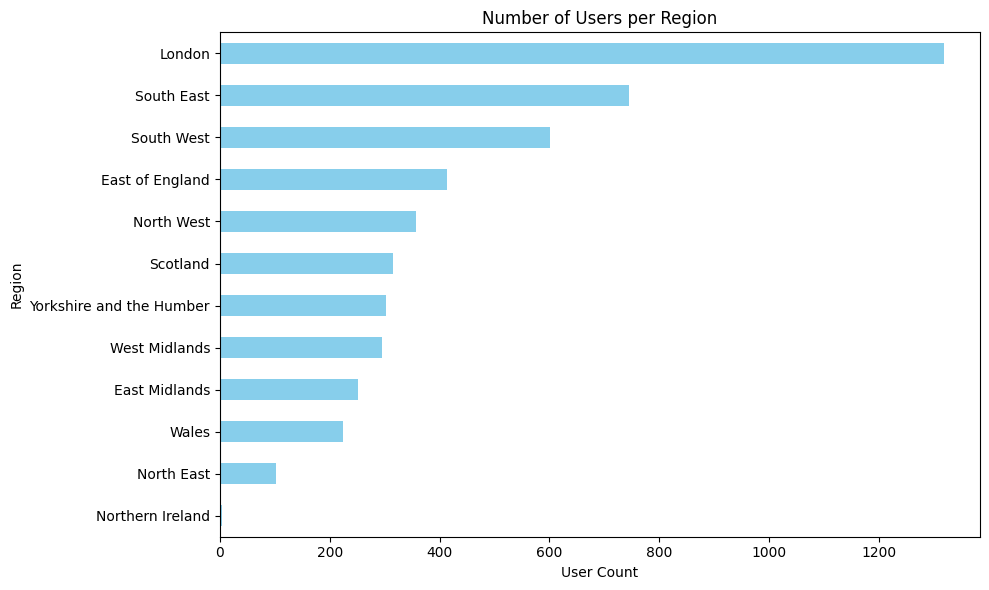

In [12]:
region_counts = users['user_nuts1'].map(nuts1_to_region).value_counts()

import matplotlib.pyplot as plt

region_counts.sort_values().plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Number of Users per Region')
plt.xlabel('User Count')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


## 3. What are user segments?

In [13]:
unique_segments = users['user_segment'].dropna().unique()

print(f"\nTotal segments (excluding NaNs): {len(unique_segments)}\n")
print("List of SEGMENTS:")
for segment in sorted(unique_segments):
    print(f"- {segment}")


Total segments (excluding NaNs): 2

List of SEGMENTS:
- Proposition
- Top Up


It seems that customers are classified into two categories.Top-up may refer to recurring customers while Proposition may refer to occasional customers. 

In [14]:
orders_with_segment = orders.merge(users[['user_id', 'user_segment']], on='user_id', how='left')

orders_exploded = orders_with_segment.explode("ordered_items")

item_counts_per_order = orders_exploded.groupby('id').size().reset_index(name='item_count')

order_meta = orders_with_segment[['id', 'user_id', 'user_segment']].drop_duplicates()
item_counts_with_segment = item_counts_per_order.merge(order_meta, on='id', how='left')

segment_order_stats = item_counts_with_segment.groupby('user_segment').agg(
    total_orders=('id', 'count'),
    total_items=('item_count', 'sum'),
    avg_items_per_order=('item_count', 'mean')
).reset_index()

orders_per_user = orders['user_id'].value_counts().reset_index()
orders_per_user.columns = ['user_id', 'order_count']

users_with_orders = users.merge(orders_per_user, on='user_id', how='left')
users_with_orders['order_count'] = users_with_orders['order_count'].fillna(0)

segment_user_stats = users_with_orders.groupby('user_segment').agg(
    total_users=('user_id', 'count'),
    total_orders=('order_count', 'sum'),
    avg_orders_per_user=('order_count', 'mean')
).reset_index()

final_stats = segment_order_stats.merge(segment_user_stats, on='user_segment', how='outer')

final_stats = final_stats.sort_values(by='avg_items_per_order', ascending=False)
print(final_stats)

  user_segment  total_orders_x  total_items  avg_items_per_order  total_users  \
0  Proposition            4177        65373            15.650706         2340   
1       Top Up            4596        42585             9.265666         2643   

   total_orders_y  avg_orders_per_user  
0            4177             1.785043  
1            4596             1.738933  


Apparently the difference seems to be in the average basket size, which is larger in the Proposition segment

## 4. How many products in the orders are not in inventory? 

In [15]:
order_items = orders['ordered_items'].explode().unique()
inventory_ids = inventory['variant_id'].dropna().unique()
missing = set(order_items) - set(inventory_ids)
print(f"Number of product IDs in orders not found in inventory: {len(missing)}")

unordered = set(inventory_ids) - set(order_items)
print(f"Number of products in inventory never ordered: {len(unordered)}")

abandoned_items = abandoned['variant_id'].explode().unique()
missing_abandoned = set(abandoned_items) - set(inventory_ids)
print(f"Number of abandoned product IDs not found in inventory: {len(missing_abandoned)}")

regular_items = regulars['variant_id'].unique()
missing_regulars = set(regular_items) - set(inventory_ids)
print(f"Number of regular product IDs not found in inventory: {len(missing_regulars)}")

Number of product IDs in orders not found in inventory: 640
Number of products in inventory never ordered: 256
Number of abandoned product IDs not found in inventory: 114
Number of regular product IDs not found in inventory: 558


We see that the products in the inventory are changing, which is a problem if we want to design a model and use the previous data.